In [3]:
%matplotlib inline

import matplotlib
import autograd.numpy as np
import matplotlib.pyplot as plt
import random
import math
from autograd import grad

def generateChevronData():
    xBounds = [-50, 50]
    yBounds = [-50, 50]
    totalPoints = 100
    
    points = []
    targets = []
    
    for i in range(0, totalPoints):
        x = random.randint(xBounds[0], xBounds[1])
        y = random.randint(yBounds[0], yBounds[1])
        
        if x >= y and x <= -y:
            points.append([x/50.0,y/50.0])
            targets.append(0)
        else:
            points.append([x/50.0,y/50.0])
            targets.append(1)
        
    return np.array(points), np.array(targets)
    
def plotScatter(points):
    xs = [x[0] for x in points]
    ys = [y[1] for y in points]
    
    plt.scatter(xs, ys)

In [8]:
def sigmoid(phi):
    return 1.0/(1.0 + np.exp(-phi))

def loss(weights):
    predictions = logisticPrediction(weights, points)
    crossEntropy = (targets*np.log(predictions) + (1-targets)*np.log(1-predictions))
    r = responsibility(weights, points)
    notLocal = list(map(lambda x: not (r[x] == 1.0),range(0, len(points))))
    
    nonLocalPoints = np.array([points[i] for i in range(0, len(points)) if notLocal[i] == True])
    nonLocalTargets = np.array([targets[i] for i in range(0, len(points)) if notLocal[i] == True])
    nonLocalPredictions = np.array([predictions[i] for i in range(0, len(points)) if notLocal[i] == True])
    nonLocalR = np.array([r[i] for i in range(0, len(points)) if notLocal[i] == True])

    
    invCrossEntropy = nonLocalTargets * (np.log(1-nonLocalPredictions)) + (1-nonLocalTargets)*(np.log(nonLocalPredictions))
    
    return -(((1/len(points)) * np.sum( r * crossEntropy )) + ((1/len(nonLocalPoints)) * np.sum(nonLocalR * invCrossEntropy)))

def logisticPrediction(weights, p):
    return np.array(list(map(lambda x: predict(weights, x), p))) 
    
def predict(weights, inputs):
    n = np.array([weights[0], weights[1]])
    i = np.array([weights[2] - inputs[0], weights[3] - inputs[1]])
    return sigmoid(np.dot(n, i))

def responsibility(weights, points):
    r = np.absolute(weights[4])
    a = np.array([weights[2], weights[3]])
    
    dif = np.array(list(map(lambda x: x - a, points)))
    s = np.array(list(map(lambda x: np.sum(np.power(x, 2)), dif)))
    d = np.sqrt(s)

    t = 1 - f(d, r)
    return t

def f(d, r):
    return np.maximum(d - np.absolute(r), 0)/(np.abs(d - np.absolute(r)) + 0.1)

In [10]:
def trainBoundaryHunter():
    weights = np.array([0.0, 0.0, 0.0, 0.0, 0.3])
    gradient = grad(loss)
    print("Initial Loss: ", loss(weights))
    for i in range(0, 10000):
        g = gradient(weights)
        
        if i % 1000 == 0:
            print("Loss [i = " + str(i) + "]: " + str(loss(weights)))
            print(weights)
            checkGrad(0.00001, 0.0001, weights, g)
        
#         weights = computeStep(weights)
        weights -= 0.001 * g
            
    print("Trained Loss: ", loss(weights))    
    print("Weights: ", weights)
    return weights

def checkGrad(pterb, threshold, weights, g):
    grad = np.zeros(len(weights))
    for i in range(0, len(weights)):
        p = np.zeros(len(weights))
        p[i] = pterb
        
        lossBefore = loss(weights)
        lossAfter = loss(weights + p)
        
        grad[i] = (lossAfter - lossBefore)/pterb
        

    return grad

    dif = np.absolute(computedGrad - grad)
    for d in dif:
        if d > threshold:
            print("ERROR")
    

Type 0:  35
Type 1:  65
[ 0.9873196   1.23223374  0.91586025  1.15602768  1.10344914  1.22441823
  0.41231056  1.34357731  1.38621788  0.65115282  0.6203225   0.58821765
  0.9963935   0.98183502  1.21605921  0.36878178  0.92195445  0.79649231
  0.85906926  0.88814413  0.8357033   1.02        0.52801515  1.0560303
  0.32557641  0.33526109  0.76157731  0.52497619  0.77820306  1.00578328
  1.29321305  0.6596969   0.82462113  0.68117545  1.05394497  0.96041658
  0.65391131  0.92130342  0.78816242  0.94762862  1.2         0.72470684
  0.73375745  0.91411159  0.30594117  1.12800709  0.64498062  0.66483081
  1.15965512  0.91782351  0.44045431  0.94762862  0.29529646  0.51264022
  0.92195445  1.0198039   0.77897368  0.86833173  1.03092192  0.28635642
  0.76157731  1.11892806  0.11661904  1.18810774  0.81437092  0.2433105
  0.76941536  0.82462113  0.74966659  1.10308658  0.76837491  0.69771054
  0.85906926  1.00975244  1.17388245  0.8         0.99297533  0.96166522
  0.52153619  1.10308658  0.2

KeyboardInterrupt: 

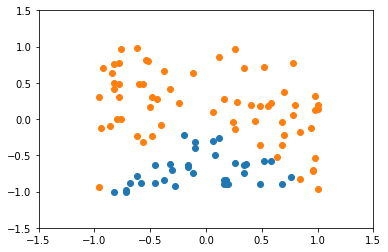

In [11]:
random.seed(1234)
points, targets = generateChevronData()

plt.axis([-1.5, 1.5, -1.5, 1.5])

# Plot points on graph
c1 = []
c2 = []

for i in range(0, len(points)):
    if targets[i] == 0:
        c1.append(points[i])
    else:
        c2.append(points[i])

print("Type 0: ", len(c1))
print("Type 1: ", len(c2))
        
plotScatter(c1)
plotScatter(c2)

weights = trainBoundaryHunter()

# plt.scatter(weights[1], weights[2])
plt.scatter(weights[2], weights[3])

n = np.array([weights[0] * weights[2] + weights[1] * weights[3], 
              -weights[0], 
              -weights[1]])

byas = -1 * n[0]/n[2]
Xcoef = -1 * n[1]/n[2]

x = np.linspace(-1.5, 1.5, 500)
y = np.linspace(-1.5, 1.5, 500)
X, Y = np.meshgrid(x,y)
F = ((X - weights[2]))**2 + ((Y - weights[3]))**2 - weights[4]**2
plt.contour(X,Y,F,[0])

print()
print(n)
print("\nLine")
print("B: " + str(byas))
print("XCoef: " + str(Xcoef))

plt.plot([-1.0, 1.0], [-1*Xcoef + byas, Xcoef + byas], 'k-')
plt.gca().set_aspect('equal')

plt.show()